In [1]:
import pandas as pd
import numpy as np 

In [2]:
books = pd .read_csv("Books.csv")
users = pd .read_csv("Users.csv")
ratings = pd .read_csv("Ratings.csv")

C:\Users\jain6\AppData\Local\Temp\ipykernel_12672\41074941.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd .read_csv("Books.csv")


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print("shape of books",books.shape)
print("shape of users",users.shape)
print("shape of ratings",ratings.shape)

shape of books (271360, 8)
shape of users (278858, 3)
shape of ratings (1149780, 3)


# checking for null value 

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# checking for duplicates

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

# popularity based recommendation system

In [13]:
ratings_with_names = ratings.merge(books,on='ISBN')

In [14]:
ratings_with_names.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [15]:
num_rating = ratings_with_names.groupby('Book-Title')['Book-Rating'].count()
num_rating_df = pd.DataFrame(num_rating)
num_rating_df.head()


,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1


In [16]:
num_rating_df.columns

Index(['Book-Rating'], dtype='object')

<Axes: xlabel='Book-Title'>

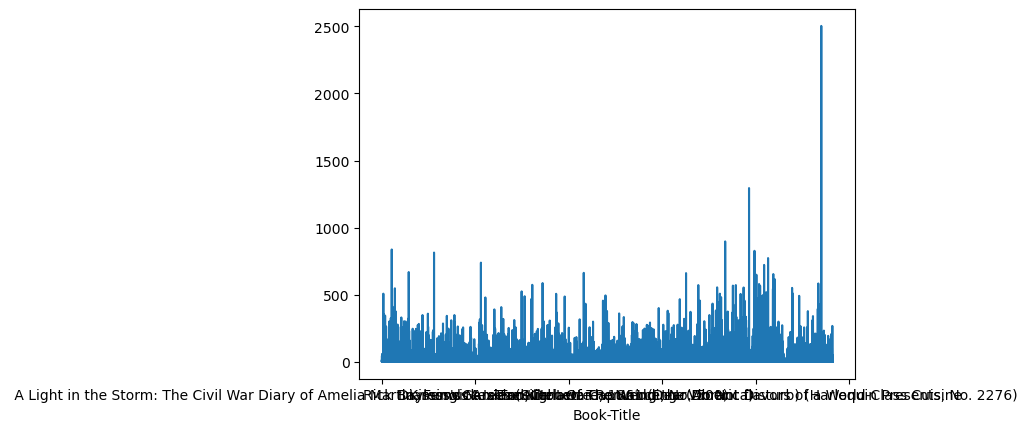

In [17]:
import matplotlib.pyplot as plt 
num_rating_df['Book-Rating'].plot()

In [18]:
num_rating_df.rename(columns ={'Book-Rating':'num_rating'},inplace=True)

In [19]:
num_rating_df.head()

,num_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1


In [20]:
avg_rating = ratings_with_names.groupby('Book-Title')['Book-Rating'].mean()
avg_rating_df = pd.DataFrame(avg_rating)
avg_rating_df.rename(columns ={'Book-Rating':'avg_rating'},inplace=True)


In [21]:
avg_rating_df.head()

,avg_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
Always Have Popsicles,0.00
Apple Magic (The Collector's series),0.00
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00


In [22]:
popularity_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [23]:
popularity_df.head()

,num_rating,avg_rating
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.25
Always Have Popsicles,1,0.00
Apple Magic (The Collector's series),1,0.00
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.00


In [24]:
popular_books = popularity_df[popularity_df['num_rating']>=250].sort_values('avg_rating',ascending = False).head(50)

In [25]:
popular_books

,num_rating,avg_rating
Book-Title,,
Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
Harry Potter and the Goblet of Fire (Book 4),387,5.824289
Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
The Hobbit : The Enchanting Prelude to The Lord of the Rings,281,5.007117
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",368,4.948370
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575,4.895652
"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [26]:
popular_books_df = popular_books.merge(books,on = 'Book-Title').drop_duplicates(['Book-Title'])

In [56]:
popular_books_df.shape

(50, 10)

# Collaborative filtering based recommender system 

In [77]:
ratings_with_names.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [29]:
x = ratings_with_names.groupby('User-ID').count()['Book-Rating']>200
pade_likhe_users = x[x].index

In [30]:
pade_likhe_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [31]:
# through this we got the users that gave rating of 200 and above number of books

In [32]:
#now we want to get that user filtered in the ratings_with_names dataset
filtered_rating = ratings_with_names[ratings_with_names['User-ID'].isin(pade_likhe_users)]

In [33]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [34]:
# now we got all the usersid and info about the books that got rated 

In [35]:
y  = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50

In [36]:
famous_books = y[y].index

In [37]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [38]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [62]:
final_ratings['Image-URL-L']

63         http://images.amazon.com/images/P/0446520802.0...
65         http://images.amazon.com/images/P/0446520802.0...
66         http://images.amazon.com/images/P/0446520802.0...
69         http://images.amazon.com/images/P/0446520802.0...
74         http://images.amazon.com/images/P/0446520802.0...
                                 ...                        
1026724    http://images.amazon.com/images/P/0531001725.0...
1027923    http://images.amazon.com/images/P/0670809381.0...
1028777    http://images.amazon.com/images/P/0440910927.0...
1029070    http://images.amazon.com/images/P/B0001PIOX4.0...
1030868    http://images.amazon.com/images/P/1586210661.0...
Name: Image-URL-L, Length: 58586, dtype: object

In [40]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values ='Book-Rating' )

In [79]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [42]:
pt.fillna(0,inplace=True)

In [43]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# in this pivot tabel we have 706 different books and 810 active users 

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
similarity_score = cosine_similarity(pt)

In [47]:
similarity_score.shape

(706, 706)

In [48]:
#now creating a function that recommend the books 

In [71]:
def recommend(book_name):
    index = np.where(pt.index ==book_name)[0][0]
    similar_items = sorted(enumerate(similarity_score[index]),key = lambda x:x[1],reverse = True)[1:6]
    
    data = []
    
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-L'].values))
        
        data.append(item)
        
    return data  
#     return similar_items

In [75]:
name = 'Harry Potter and the Prisoner of Azkaban (Book 3)'
recommend(name)

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  2000,
  'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  2000,
  'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  2003,
  'http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  1998,
  'http://images.amazon.com/images/P/0590353403.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  1999,
  'http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg']]

In [51]:
name

'Skipping Christmas'

In [59]:
import pickle
pickle.dump(popular_books_df,open('popular.pkl','wb'))

In [61]:
popular_books_df.columns

Index(['Book-Title', 'num_rating', 'avg_rating', 'ISBN', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [74]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))